In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
sns.set(style="whitegrid")

In [44]:
#数据的基本信息,数据的维度，数据的类型，时间数据的处理
#缺失数据的处理
#数值型数据的分布
#分类型数据的分布

NameError: name '数据的基本信息' is not defined

In [6]:
train_data = pd.read_csv("D:\\data\\rossmann-store-sales\\train.csv")
store_data = pd.read_csv("D:\\data\\rossmann-store-sales\\store.csv")

In [12]:
# store基本信息
print("store.shape: " , store_data.shape)
print("train.shape:",train_data.shape)


store.shape:  (1115, 10)
train.shape: (1017209, 9)


In [15]:
df_new =train_data.merge(store_data, on =["Store"],how="inner")
print(df_new.shape)

(1017209, 18)


In [16]:
df_new.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [17]:
print("stores:",len(df_new["Store"].unique()))

stores: 1115


In [18]:
print("Days:",len(df_new["Date"].unique()))

Days: 942


In [19]:
print("average daily sales of all stores: ",round(df_new["Sales"].mean(),2))

average daily sales of all stores:  5773.82


In [20]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [21]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [24]:
df_new['Date'] = pd.to_datetime(df_new['Date'],infer_datetime_format=True)
df_new['Month'] = df_new['Date'].dt.month
df_new['Quarter'] = df_new['Date'].dt.quarter
df_new['Year'] = df_new['Date'].dt.year
df_new['Day'] = df_new['Date'].dt.day
df_new['week'] =df_new['Date'].dt.week
df_new['Season']=np.where(df_new['Month'].isin([3,4,5]),"Spring",
                 np.where(df_new['Month'].isin([6,7,8]),"Summer",
                 np.where(df_new['Month'].isin([9,10,11]),"Fall",
                 np.where(df_new['Month'].isin([12,1,2]),"Winter","None"))))

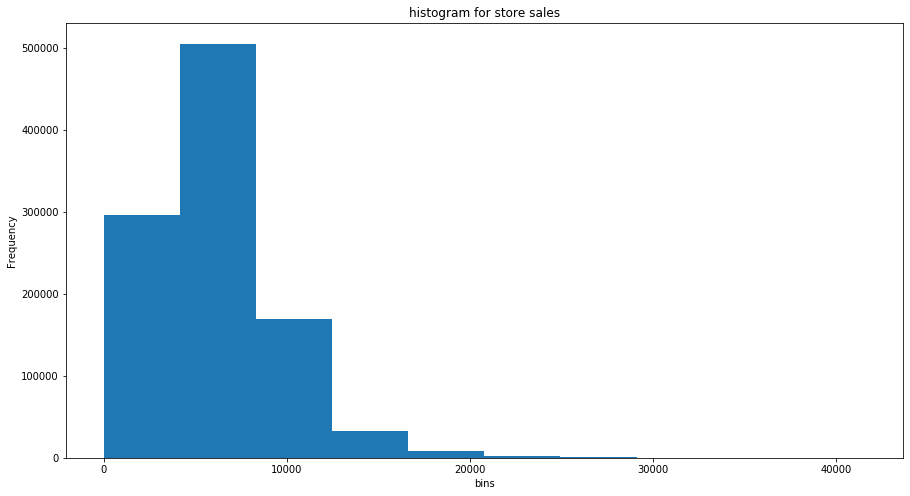

In [32]:
plt.figure(figsize=(15,8))
plt.hist(df_new['Sales'])
plt.title("histogram for store sales")
plt.xlabel("bins")
plt.ylabel("Frequency")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DBDBD2288>,
      dtype=object)

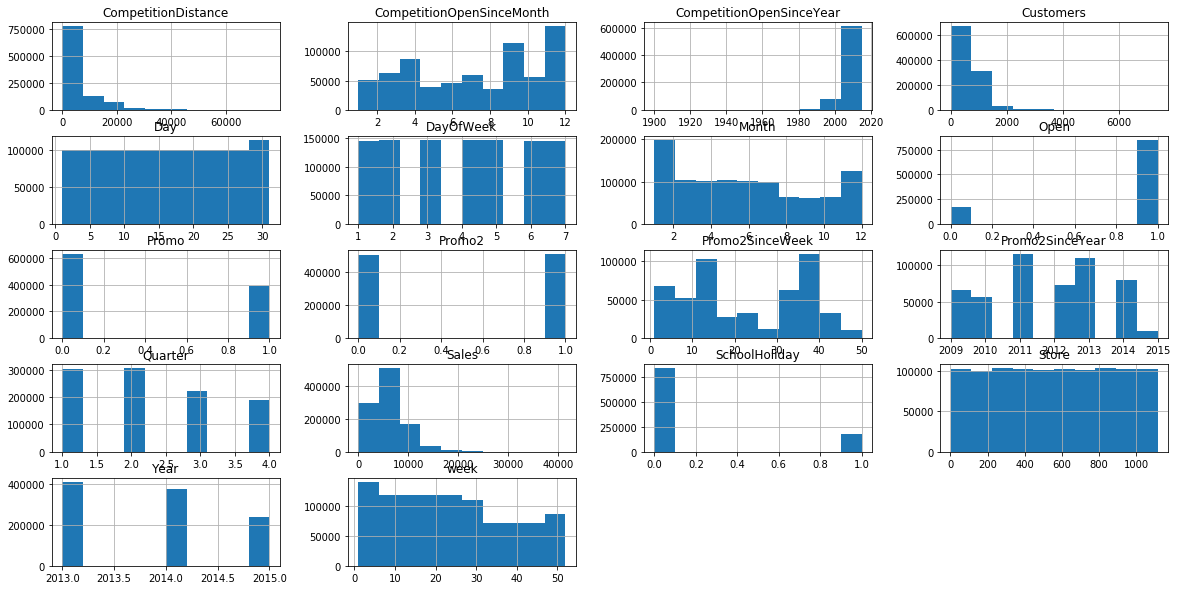

In [33]:
df_new.hist(figsize=(20,10))

In [34]:
#cha
df_new.isnull().sum()/df_new.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
week                          0.000000
Season                        0.000000
dtype: float64

In [36]:
df_new['CompetitionDistance'] = df_new['CompetitionDistance'].fillna(df_new['CompetitionDistance'].mode()[0])
df_new['CompetitionDistance'].isnull().sum()/df_new.shape[0]*100

0.0

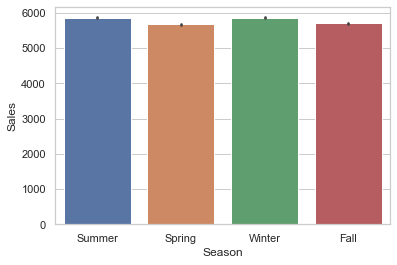

In [39]:
ax = sns.barplot(x='Season',y='Sales',data=df_new)

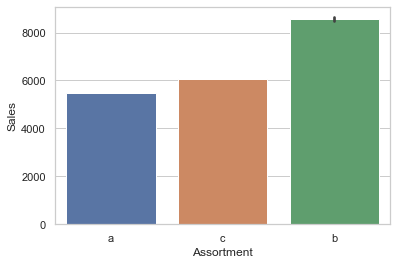

In [40]:
ax =sns.barplot(x="Assortment",y="Sales",data=df_new)

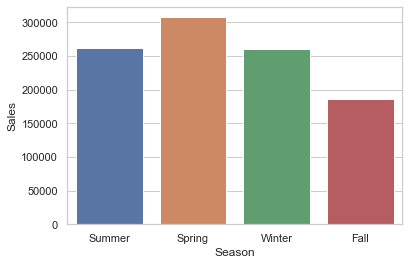

In [41]:
ax = sns.barplot(x="Season",y="Sales",data=df_new,estimator=np.size)

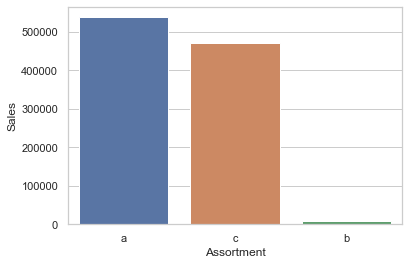

In [42]:
ax = sns.barplot(x="Assortment",y="Sales",data=df_new,estimator=np.size)

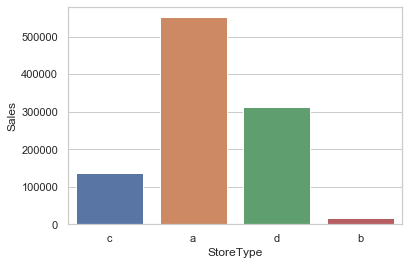

In [43]:
ax =sns.barplot(x="StoreType",y="Sales",data=df_new,estimator=np.size)

In [46]:
#针对分类变量的编码

target = ['Sales']
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday",
                  "SchoolHoliday","CompetitionDistance"]
categorical_columns = ['DayOfWeek','Quarter','Month','Year','StoreType','Assortment','Season']

In [47]:
#one-hot编码
def create_ohe(df,col):
    le = LabelEncoder()
    a = le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns=column_names))
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)
    

d:\python3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
d:\python3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before thi

In [48]:
print("Shape of Data:",temp.shape)
print("Distinct DataTypes:",temp.dtypes.unique())

Shape of Data: (1017209, 45)
Distinct DataTypes: [dtype('int64') dtype('O') dtype('float64')]


In [49]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [51]:
temp['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [52]:
temp["StateHoliday"]=np.where(temp["StateHoliday"]=='0',0,1)

In [53]:
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

In [60]:
x_train.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Fall,Season_Spring,Season_Summer,Season_Winter
157696,741,1,1,0,0,0,0,4130.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
517215,785,1,1,1,0,0,0,1010.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799211,1080,1,1,0,1,0,0,29190.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
592833,1175,1,1,0,0,0,0,200.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
768559,524,1,0,1,0,1,1,2030.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
#模型的搭建

In [61]:
model = Sequential()
model.add(Dense(150,input_dim=45,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])
model.fit(x_train.values,y_train.values,validation_data=(x_val,y_val),epochs=10,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 10s 14us/step - loss: 959.7907 - mean_absolute_error: 959.7914 - val_loss: 841.0982 - val_mean_absolute_error: 841.0983
Epoch 2/10
732390/732390 [==============================] - 10s 14us/step - loss: 788.7725 - mean_absolute_error: 788.7723 - val_loss: 754.8144 - val_mean_absolute_error: 754.8137
Epoch 3/10
732390/732390 [==============================] - 10s 14us/step - loss: 740.8183 - mean_absolute_error: 740.8182 - val_loss: 733.0099 - val_mean_absolute_error: 733.0096
Epoch 4/10
732390/732390 [==============================] - 10s 14us/step - loss: 723.0439 - mean_absolute_error: 723.0445 - val_loss: 710.2492 - val_mean_absolute_error: 710.2495
Epoch 5/10
732390/732390 [==============================] - 10s 14us/step - loss: 712.3368 - mean_absolute_error: 712.3365 - val_loss: 697.2833 - val_mean_absolute_error: 697.2836
E

In [62]:
result = model.evaluate(x_test.values,y_test.values)

203442/203442 [==============================] - 2s 11us/step


In [64]:
for i in range(len(model.metrics_names)):
    print("Metric",model.metrics_names[i],":",str(round(result[i],2)))

Metric loss : 699.76
Metric mean_absolute_error : 699.76


In [70]:
model=Sequential()
model.add(Dense(350,input_dim=45,activation='relu'))
model.add(Dense(350,activation='relu'))
model.add(Dense(350,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=64)

Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 48s 65us/step - loss: 1616070.4230 - mean_absolute_error: 832.5670 - val_loss: 1238592.8780 - val_mean_absolute_error: 769.8093
Epoch 2/10
732390/732390 [==============================] - 46s 62us/step - loss: 1161054.2839 - mean_absolute_error: 723.8837 - val_loss: 1025630.3883 - val_mean_absolute_error: 680.8167
Epoch 3/10
732390/732390 [==============================] - 47s 64us/step - loss: 1089089.5401 - mean_absolute_error: 699.6439 - val_loss: 1045214.3241 - val_mean_absolute_error: 697.6609
Epoch 4/10
732390/732390 [==============================] - 48s 66us/step - loss: 1056402.0842 - mean_absolute_error: 689.8660 - val_loss: 984918.8825 - val_mean_absolute_error: 670.3123
Epoch 5/10
732390/732390 [==============================] - 54s 73us/step - loss: 1023973.5085 - mean_absolute_error: 678.9352 - val_loss: 972637.8916 - val_mean_absolute_error: 663.9968
Epoch 6/10


In [67]:
result = model.evaluate(x_test,y_test)

203442/203442 [==============================] - 3s 15us/step


In [69]:
print(result[0],result[1])

955715.4334122256 675.7569580078125


d:\python3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upprt right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


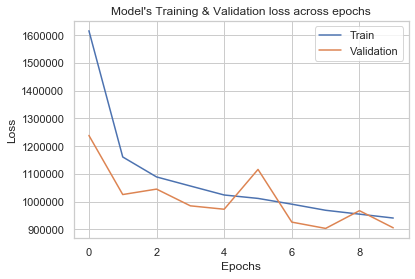

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upprt right')
plt.show()